In [1]:
# Introduction to Seaborn

In [2]:
ls

Pokemon.csv  Untitled.ipynb


In [3]:
!head -5 Pokemon.csv

#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('Pokemon.csv', index_col= 0)
df.head()

Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
#                                                                              
1              Bulbasaur  Grass  Poison    318  45      49       49       65   
2                Ivysaur  Grass  Poison    405  60      62       63       80   
3               Venusaur  Grass  Poison    525  80      82       83      100   
3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123      122   
4             Charmander   Fire     NaN    309  39      52       43       60   

   Sp. Def  Speed  Generation  Legendary  
#                                         
1       65     45           1      False  
2       80     60           1      False  
3      100     80           1      False  
3      120     80           1      False  
4       50     65           1      False

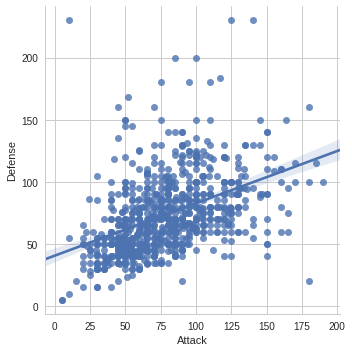

In [108]:
# default plot scatter plot
x = sns.lmplot('Attack', 'Defense', data=df)

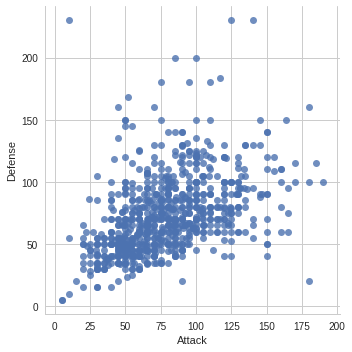

In [109]:
# remove the regression line
x =sns.lmplot('Attack', 'Defense', data=df, fit_reg=False)

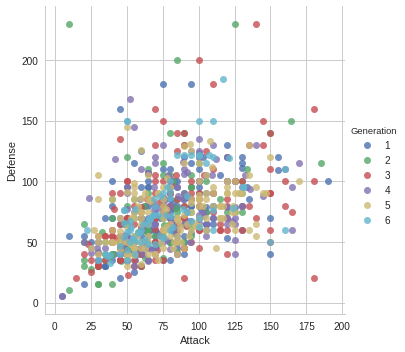

In [110]:
# This hue argument is very useful because it allows 
# you to express a third dimension of information using color.
x = sns.lmplot('Attack', 'Defense', data=df, fit_reg=False, hue='Generation')


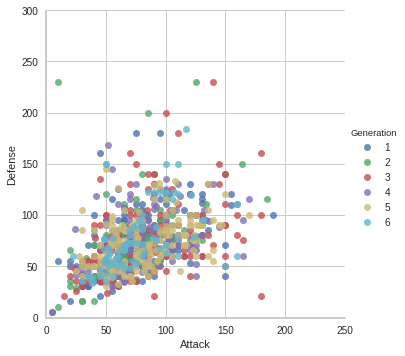

In [112]:
# Customizing with Matplotlib.
x = sns.lmplot('Attack', 'Defense', data=df, fit_reg=False, hue='Generation')
x = plt.xlim(-1, 250)
x =plt.ylim(-1, 300)

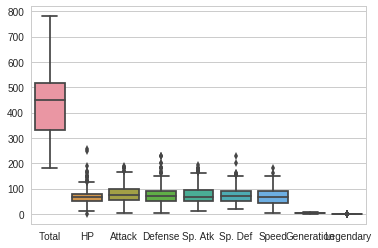

In [113]:
# The role of Pandas.
x = sns.boxplot(data=df)

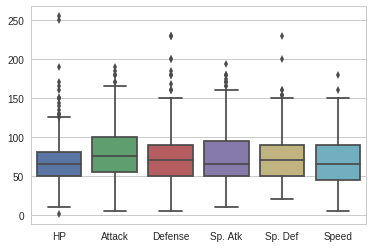

In [114]:
# Pre-format DataFrame
df1= df.drop(['Total', 'Generation', 'Legendary'], axis=1)
x =sns.boxplot(data= df1)

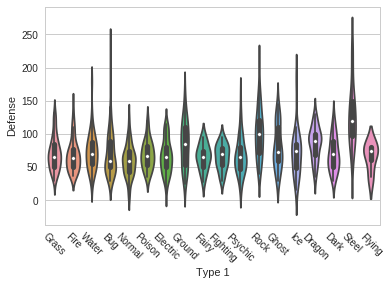

In [115]:
# Seaborn themes.
sns.set_style('whitegrid')

# Violin plot
x = sns.violinplot('Type 1', 'Defense', data=df1)
x = plt.xticks(rotation=-45)


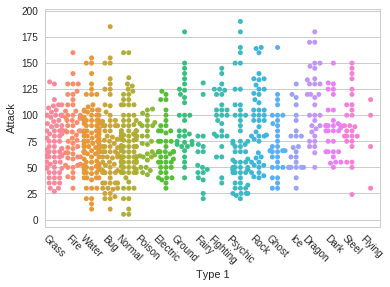

In [116]:
# Swarm plot 

x = sns.swarmplot(x='Type 1', y='Attack', data=df)
x = plt.xticks(rotation=-45)

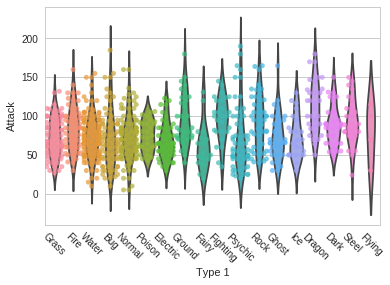

In [117]:
x = sns.violinplot(x='Type 1',
                   y='Attack', 
                   data=df, 
                   inner=None) # Remove the bars inside the violins
x = sns.swarmplot(x='Type 1',
                   y='Attack',
                  alpha=0.7,
                   data=df)
x = plt.xticks(rotation=-45)

# pandas.melt()

In [64]:
df2 = pd.melt(df, id_vars=["Name", "Type 1", "Type 2"],value_vars=['HP'], var_name="Stat")
df2.head()

Name Type 1  Type 2 Stat  value
0              Bulbasaur  Grass  Poison   HP     45
1                Ivysaur  Grass  Poison   HP     60
2               Venusaur  Grass  Poison   HP     80
3  VenusaurMega Venusaur  Grass  Poison   HP     80
4             Charmander   Fire     NaN   HP     39

In [65]:
print(df.shape)
print(df2.shape)

(800, 12)
(800, 5)


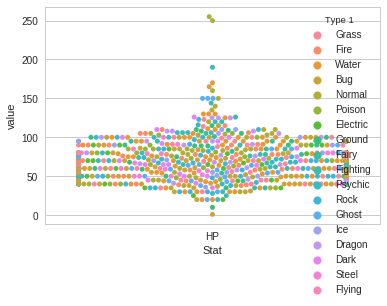

In [106]:
x = sns.swarmplot(x='Stat', y='value', data=df2, hue='Type 1')

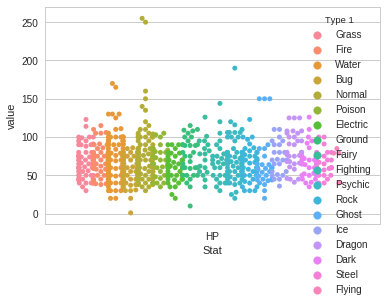

In [118]:
x = sns.swarmplot(x='Stat', 
              y='value', 
              data=df2, 
              hue='Type 1', 
              split=True)

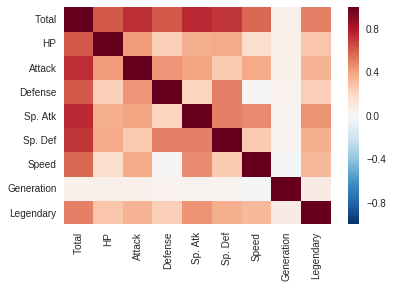

In [119]:
# Heatmap
corr = df.corr()
corr

x = sns.heatmap(corr)

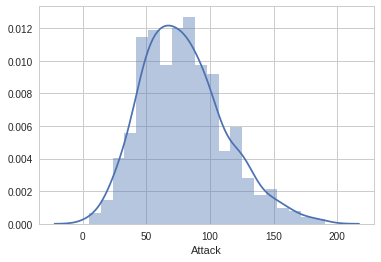

In [120]:
#  Histogram
# Histograms allow you to plot the distributions of numeric variables
x = sns.distplot(df.Attack)


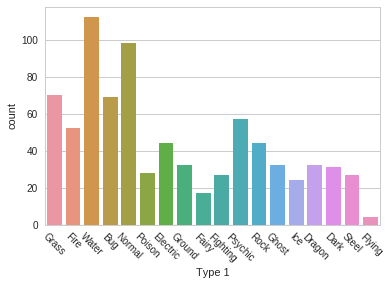

In [121]:
# Bar Plot
x = sns.countplot(x='Type 1', data=df)
x = plt.xticks(rotation=-45)

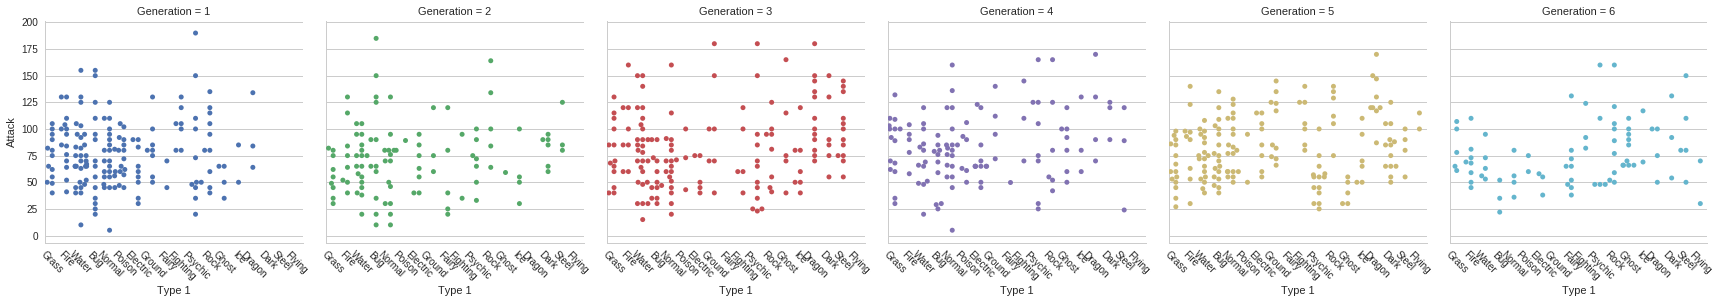

In [122]:
# Factor Plot

g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Generation',  # Color by stage
                   col='Generation',  # Separate by stage
                   kind='swarm')
x = g.set_xticklabels(rotation=-45)

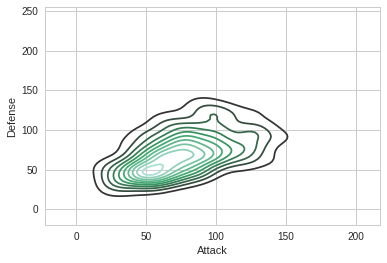

In [123]:
# Density Plot
x = sns.kdeplot(df.Attack, df.Defense)

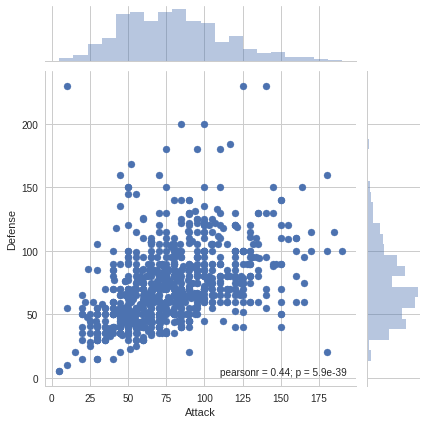

In [124]:
# Joint Distribution Plot
x = sns.jointplot(x='Attack', y='Defense', data=df)